## Spark Model Plot

In [1]:
import pandas as pd
#%matplotlib notebook
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np
import matplotlib.pyplot as plt
import dateutil
import dateutil.parser
import time


from bokeh.plotting import figure, output_file
from bokeh.charts import Bar, output_file, show
import bokeh.plotting as bplt
from bokeh.palettes import Dark2_5 as palette
from bokeh.models import Label, Title
import itertools  
from bokeh.layouts import gridplot,row,column

#from bokeh.io import hplot, output_file, show
from bokeh.plotting import figure

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
from bokeh.io import output_notebook
plt.style.use('ggplot')
#output_notebook()
import plotlib as pltme

Loading BokehJS ...

In [2]:
directory = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/'
directory = directory + '1-node/'

In [3]:
#throughput_p812_1 = producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
## all producers
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)

throughput_p812_1 = pltme.producer_throughtput_per_mini_batch(adir,dataset)  # record per seconds
throughin_812 = pltme.plot_throughput_per_mini_batch('8-1-2-new-settings/spark-metrics-20171107-234051.csv',1,showPlot=False)
processing_time_812 =  pltme.plot_scheduling_and_Total_Delay('8-1-2-new-settings/spark-metrics-20171107-234051.csv',1,'title',showPlot=True)
processing_records_per_second_per_batch_812 = pltme.rec_per_sec(processing_time_812,throughin_812)
average_record_throughin = pltme.find_total_consumer_throughin('8-1-2-new-settings/spark-metrics-20171107-234051.csv',17*60)  #5400
print ' Through-in rate is: %d Records/sec ' % average_record_throughin

## all producers
producers = '8-1-2-new-settings/producers/'
adir = '/home/georgeha/repos/midas_exps/streaming/k-means/spark/1-node/8-1-2-new-settings/producers/'
dataset =  pltme.find_producers_file(adir)
avg_production_rate_812 = pltme.find_total_producer_throughput(producers,dataset,950,False,'')

 Through-in rate is: 174 Records/sec 


In [38]:
avg_throughput_p_812 = sum(throughput_p812_1[1])/len(throughput_p812_1[1])
std_throughput_p_812 = np.std(throughput_p812_1[1])

In [151]:
from scipy import stats
mean, sigma = np.mean(throughput_p812_1[1]), np.std(throughput_p812_1[1])


stats.norm.interval(0.45, loc=mean, scale=sigma)


(14.268136673521845, 27.598529993144822)

In [102]:
stats.norm.interval(0.67, loc=mean, scale=sigma/np.sqrt(len(throughput_p812_1[1])))


(18.128867670650223, 23.737798996016444)

(array([  3.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,  10.]),
 array([  2. ,   4.7,   7.4,  10.1,  12.8,  15.5,  18.2,  20.9,  23.6,
         26.3,  29. ]),
 <a list of 10 Patch objects>)

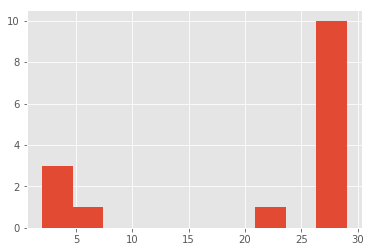

In [42]:
plt.hist(throughput_p812_1[1])

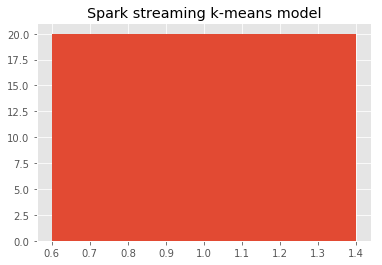

In [198]:
objects = ('Producer-8-1-2')
x_pos = np.arange(len(objects))
x_pos=1

plt.bar(x_pos,avg_throughput_p_812,align='center')

plt.title("Spark streaming k-means model")


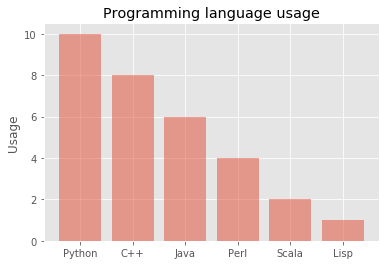

In [24]:
 
objects = ('Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp')
y_pos = np.arange(len(objects))
performance = [10,8,6,4,2,1]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Usage')
plt.title('Programming language usage')
 


In [25]:
y_pos

array([0, 1, 2, 3, 4, 5])

In [30]:
x_pos

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

In [32]:
objects

'Producer-8-1-2'

In [53]:
values.shape[0]

15

In [61]:
aa = pd.read_csv(directory + '8-1-2-new-settings/spark-metrics-20171107-234051.csv')

In [78]:
aa = pd.read_csv('test.csv',header=None)

In [85]:
aa.values.shape

(12, 1)

In [290]:
np.random.randn(10).reshape(10,1)

array([[ 0.24108004],
       [-0.726002  ],
       [ 2.65446583],
       [-0.91061687],
       [ 0.21938036],
       [-0.3296636 ],
       [-1.13865388],
       [-0.55923544],
       [ 1.48504823],
       [-1.12967616]])

In [81]:
throughput_p812_1[1]

[27, 21, 29, 28, 29, 29, 29, 29, 27, 28, 27, 5, 2, 2, 2]

In [357]:
from astropy.stats import bootstrap
from astropy.utils import NumpyRNGContext

test_statistic = lambda x: (np.mean(x), np.std(x))


#bootarr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])

#bootarr = np.asarray(throughput_p812_1[1]).reshape(15,1)

el = 60
bootarr = np.random.randn(el).reshape(el,1)

#a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0]).reshape(10,1)
resamples = 16

with NumpyRNGContext(1):
    bootresult = bootstrap(bootarr, resamples)  #,bootfunc=test_statistic)

#print bootresult

bootresult.shape

print np.mean(bootresult[0])
print np.mean(bootresult[1])

arr = bootresult.reshape(1,resamples*el)


-0.151312129055
0.0384010055172


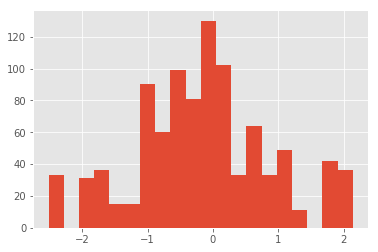

In [358]:
a = plt.hist(arr.tolist(),bins=20)

In [117]:
a = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0])
np.mean(a)

4.5

In [118]:
np.std(a)

2.8722813232690143

In [142]:
np.mean(bootresult)

3.614206297412593

In [143]:
np.mean(bootresult[:,0])

4.5374999999999996

In [144]:
np.mean(bootresult[:,1])

2.6909125948251855

In [ ]:
# The 68% confidence interval for a single draw from a normal distribution with mean mu and std deviation sigma is
stats.norm.interval(0.68, loc=mu, scale=sigma)

#The 68% confidence interval for the mean of N draws from a normal distribution with mean mu and std deviation sigma is
stats.norm.interval(0.68, loc=mu, scale=sigma/sqrt(N))




In [158]:
ss.t.ppf(0.95, data_df)*data_sd

array([ 22.1655321 ,  23.31816336,  22.73494326,  26.03367253])

In [165]:
# including upper limits
ax.errorbar(x, y + 0.5, xerr=xerr, yerr=yerr, uplims=uplims,
            linestyle=ls)

<Container object of 3 artists>

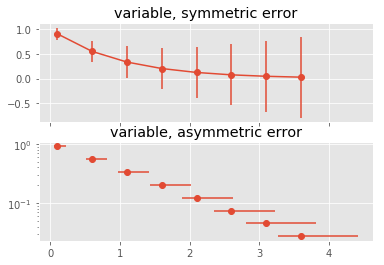

In [201]:
import numpy as np
import matplotlib.pyplot as plt

# example data
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# example error bar values that vary with x-position
error = 0.1 + 0.2 * x

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('variable, symmetric error')

# error bar values w/ different -/+ errors that
# also vary with the x-position
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')

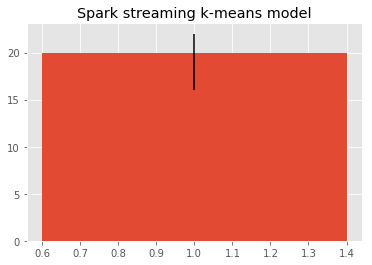

In [229]:
objects = ('Producer-8-1-2')
x_pos = np.arange(len(objects))
x_pos=1

plt.bar(x_pos,avg_throughput_p_812,align='center',yerr=eeer)

plt.title("Spark streaming k-means model")

In [206]:
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

In [217]:
asymmetric_error[1].shape

(8,)

In [208]:
lower_error

array([ 0.048,  0.088,  0.128,  0.168,  0.208,  0.248,  0.288,  0.328])

In [213]:
error

array([ 0.12,  0.22,  0.32,  0.42,  0.52,  0.62,  0.72,  0.82])

In [225]:
lower_error = 4*np.array([1])

In [216]:
lower_error.shape

(1,)

In [226]:
upper_error = 2*np.array([1])

In [227]:
eeer = [lower_error,upper_error]

In [220]:
eeer

[array([ 0.4]), array([ 0.9])]